In [23]:
import numpy as np
import matplotlib.pyplot as plt

import os, sys
sys.path.insert(0, "/home/storage/hans/jax_reco_new")

from lib.plotting import adjust_plot_1d

In [53]:
dat = np.load('/home/storage/hans/jax_reco_new/examples/MuMinus_150e3GeV_Horizontal_CloseToDOMs_Stochastic_N100_SPE.npy')
#dat = np.load('/home/storage/hans/jax_reco_new/examples/MuMinus_150e3GeV_Horizontal_FarFromDOMs_Stochastic_N100_SPE.npy')
#dat = np.load('/home/storage/hans/jax_reco_new/examples/MuMinus_150e3GeV_Horizontal_CloseToDOMs_Smooth_N100_SPE.npy')
#dat = np.load('/home/storage/hans/jax_reco_new/examples/MuMinus_150e3GeV_Horizontal_FarFromDOMs_Smooth_N100_SPE.npy')

In [54]:
def GreatCircleDistance(azi_1, zen_1, azi_2, zen_2):
        ra_1 = azi_1
        ra_2 = azi_2
        dec_1 = np.pi/2.0 - zen_1
        dec_2 = np.pi/2.0 - zen_2
        '''Compute the great circle distance between two events'''
        '''All coordinates must be given in radians'''
        delta_dec = np.abs(dec_1 - dec_2)
        delta_ra = np.abs(ra_1 - ra_2)
        x = (np.sin(delta_dec / 2.))**2. + np.cos(dec_1) *\
            np.cos(dec_2) * (np.sin(delta_ra / 2.))**2.
        return 2. * np.arcsin(np.sqrt(x))

def get_gcd(results):
    scale = 20.0
    reco_zenith, reco_azimuth = results[:, -5]/scale, results[:, -4]/scale
    track_src_v = results[:, 2:4]
    true_zenith, true_azimuth = track_src_v[:, 0], track_src_v[:, 1]
    smpe_zenith, smpe_azimuth = results[:, 8], results[:, 9]
    gcd = np.rad2deg(GreatCircleDistance(true_azimuth, true_zenith, reco_azimuth, reco_zenith))
    gcd_smpe = np.rad2deg(GreatCircleDistance(true_azimuth, true_zenith, smpe_azimuth, smpe_zenith))
    muon_energy = results[:, 0]
    return gcd, gcd_smpe, muon_energy

def get_zen_azi(results):
    scale = 20.0
    reco_zenith, reco_azimuth = results[:, -5]/scale, results[:, -4]/scale
    track_src_v = results[:, 2:4]
    true_zenith, true_azimuth = track_src_v[:, 0], track_src_v[:, 1]
    smpe_zenith, smpe_azimuth = results[:, 8], results[:, 9]
    return track_src_v[:, 0], track_src_v[:, 1], reco_zenith, reco_azimuth, smpe_zenith, smpe_azimuth

def get_hist(results):
    gcd, gcd_smpe, muon_energy = get_gcd(results)
    bins = np.linspace(0.0, 3.0, 41)
    cts, _ = np.histogram(gcd, bins=bins)
    cts_smpe, _ = np.histogram(gcd_smpe, bins=bins)
    return cts, bins, cts_smpe

In [55]:
TPN_MPE, bins, S_MPE = get_hist(dat)

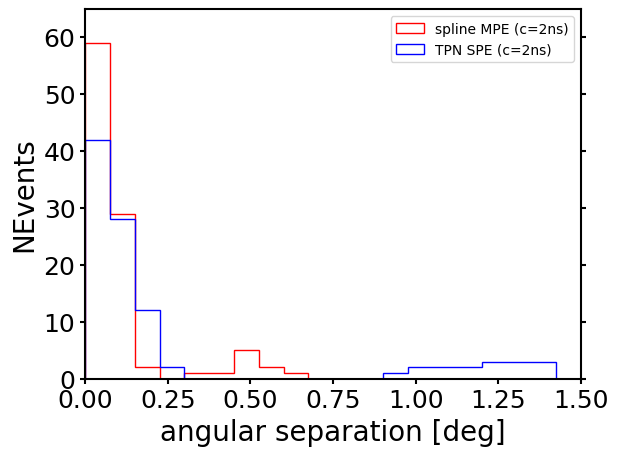

In [56]:
    plot_args = {'xlabel':'angular separation [deg]', 
                 'ylabel':'NEvents', 
                 'xlim':[0.0, 1.5], 
                 'ylim':[0.0, np.amax([np.max(TPN_MPE), np.max(S_MPE)])*1.1]}
    
    fig, ax = plt.subplots()
    plt.hist(0.5*(bins[1:]+bins[:-1]), bins=bins, weights=S_MPE, histtype='step', 
             label='spline MPE (c=2ns)', color='red')
    plt.hist(0.5*(bins[1:]+bins[:-1]), bins=bins, weights=TPN_MPE, histtype='step', 
             label='TPN SPE (c=2ns)', color='blue')
    adjust_plot_1d(fig, ax, plot_args=plot_args)
    plt.show()

In [57]:
true_zen, true_azi, reco_zen, reco_azi, smpe_zen, smpe_azi = get_zen_azi(dat)

(0.14707963267948965, 0.16707963267948966)

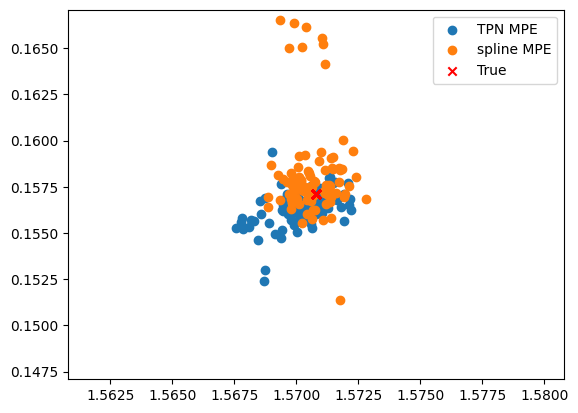

In [60]:
fig, ax = plt.subplots()
plt.scatter(reco_zen, reco_azi, label='TPN MPE')
plt.scatter(smpe_zen, smpe_azi, label='spline MPE')
plt.scatter(true_zen, true_azi, marker='x', color='red', label='True')
plt.legend()
d_zen = 0.01
plt.xlim([true_zen[0]-d_zen, true_zen[0]+d_zen])
plt.ylim([true_azi[0]-d_zen, true_azi[0]+d_zen])

In [59]:
print(true_azi)

[0.15707963 0.15707963 0.15707963 0.15707963 0.15707963 0.15707963
 0.15707963 0.15707963 0.15707963 0.15707963 0.15707963 0.15707963
 0.15707963 0.15707963 0.15707963 0.15707963 0.15707963 0.15707963
 0.15707963 0.15707963 0.15707963 0.15707963 0.15707963 0.15707963
 0.15707963 0.15707963 0.15707963 0.15707963 0.15707963 0.15707963
 0.15707963 0.15707963 0.15707963 0.15707963 0.15707963 0.15707963
 0.15707963 0.15707963 0.15707963 0.15707963 0.15707963 0.15707963
 0.15707963 0.15707963 0.15707963 0.15707963 0.15707963 0.15707963
 0.15707963 0.15707963 0.15707963 0.15707963 0.15707963 0.15707963
 0.15707963 0.15707963 0.15707963 0.15707963 0.15707963 0.15707963
 0.15707963 0.15707963 0.15707963 0.15707963 0.15707963 0.15707963
 0.15707963 0.15707963 0.15707963 0.15707963 0.15707963 0.15707963
 0.15707963 0.15707963 0.15707963 0.15707963 0.15707963 0.15707963
 0.15707963 0.15707963 0.15707963 0.15707963 0.15707963 0.15707963
 0.15707963 0.15707963 0.15707963 0.15707963 0.15707963 0.1570